In [74]:
# Exercise1 -1
# 메이저리그 야구에서 대부분 0.2~0.33 사이의 타율을 가지고 있음. 
# 첫 게임에 등장한 플레이어가 3번의 시도중 3번의 안타를 기록했다고 가정, 적중확률에 대한 사후 분포는?
# prior / likelihood / unnorm / posterior
# prior
# 0.1~0.4 사이 100개의 사전 데이터 생성
import numpy as np
from empiricaldist import Pmf

hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

In [75]:
# likelihood, 딕셔너리형태로 Y: getting a hit, N not getting a hit 생성
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

In [76]:
# 사전 분포 생성 안타가 25프로가 되도록
dataset = 'Y' * 25 + 'N' * 75

In [77]:
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.3596964206970507e-23

In [78]:
prior

,probs
0.100,0.000003
0.103,0.000004
0.106,0.000007
0.109,0.000011
0.112,0.000017
...,...
0.388,0.000392
0.391,0.000329
0.394,0.000275
0.397,0.000229


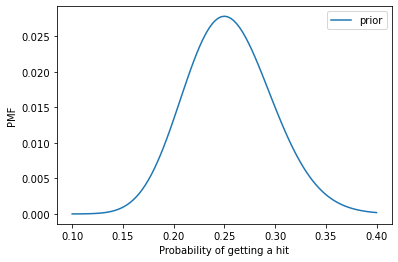

In [79]:
import matplotlib.pyplot as plt
plt.plot(prior, label='prior')
plt.xlabel('Probability of getting a hit')
plt.ylabel('PMF')
plt.legend()

0.017944179687707326


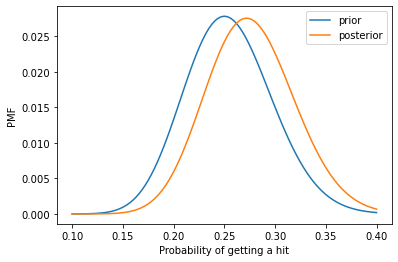

In [80]:
# # E 1-1 정답 분포 시각화
#적중확률에 대한 사후 분포는
# posterior 구하기(hit에 대한!!!)
posterior = prior.copy()
# hit이 3번 이어야함!!
for data in 'YYY':
    posterior *= likelihood[data]
print(posterior.normalize())

plt.plot(prior, label='prior')
plt.plot(posterior, label='posterior')
plt.xlabel('Probability of getting a hit')
plt.ylabel('PMF')
plt.legend()

In [81]:
# E 1-2
# What is the most likely quantity in the posterior distribution?
# e1-2 답 : 0.271
posterior.max_prob()

0.271

In [82]:
# Exercise2
# Suppose you survey 100 people this way and get 80 YESes and 20 NOs. 
# E2-1 : Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? 
# E2-2 : What is the most likely quantity in the posterior distribution?
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

In [83]:
# likelihood 계산
likelihood = {
    'Y': 0.5 + hypos/2,
    'N': (1-hypos)/2
}

In [84]:
# 80개의 예와 20개의 아니요
dataset = 'Y' * 80 + 'N' * 20
# 80개의 예와 20개의 아니요의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()

3.6945139133967024e-21

Text(0, 0.5, 'PMF')

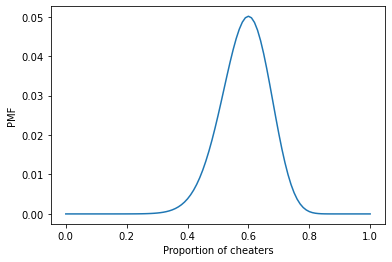

In [85]:
# e2-1 답을 위한 시각화
plt.plot(posterior, label='80 YES, 20 NO')
plt.xlabel('Proportion of cheaters')
plt.ylabel('PMF')

In [86]:
# E2-2 번 답 : 0.6
posterior.idxmax()

0.6

In [87]:
# Exercise3
"""Suppose you want to test whether a coin is fair, but you don’t want to spin it hundreds of times. 
So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.
However, you discover that the machine is not always accurate. 
Specifically, suppose the probability is y=0.2 that an actual heads is reported as tails, or actual tails reported as heads.

"""
# E3-1 : If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of x? 
# E3-2 : What happens as you vary the value of y?
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# likelihood 계산
y=0.2
likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
}
# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-1 답 

4.391534169454059e-74

Text(0, 0.5, 'PMF')

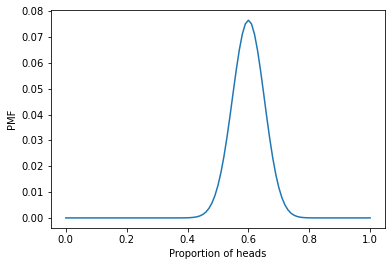

In [88]:
# e3-1 답 시각화
plt.plot(posterior, label='spin a coin 250 times and the machine reports 140 heads')
plt.xlabel('Proportion of heads')
plt.ylabel('PMF')

In [89]:
# e3-2
y=0.0
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# likelihood 계산
likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
}
# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-2 답
posterior.idxmax()

0.56

In [90]:
# e3-2
y=0.1
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# likelihood 계산
likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
}
# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-2 답
posterior.idxmax()

0.5700000000000001

In [91]:
# e3-2
y=0.3
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# likelihood 계산
likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
}
# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-2 답
posterior.idxmax()

0.65

In [92]:
# e3-2
y=0.4
# prior 계산
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# likelihood 계산
likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
}
# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-2 답
posterior.idxmax()

0.8

In [93]:
# exercise 4
# 모르겠습니다 likelihood부터 모르겠습니다.
"""
In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders. 
Of course, some missile designs are better than others; let’s assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of x in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested. In a press conference, 
an EDL general reports that the new design has been tested twice, taking two shots during each test. 
The results of the test are confidential, so the general won’t say how many targets were hit, 
but they report: “The same number of targets were hit in the two tests, so we have reason to think this new design is consistent.”

Is this data good or bad? That is, does it increase or decrease your estimate of x for the Alien Blaster 9000?

Hint: If the probability of hitting each target is x, the probability of hitting one target in both tests is 2*x*(1-x))**2.
"""
# Is this data good or bad? That is, does it increase or decrease your estimate of x for the Alien Blaster 9000?
# prior 계산
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

# likelihood 계산
x = hypos
likes = [(1-x)**4, (2*x*(1-x))**2, x**4]
likelihood = np.sum(likes, axis=0)

# spin a coin 250 times and the machine reports 140 heads
dataset = 'H' * 140 + 'T' * 110
# spin a coin 250 times and the machine reports 140 heads의 posterior 계산
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]
# 정규화
posterior.normalize()
# e3-1 답 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices